In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

%matplotlib inline 

# Part a)

In [5]:
def low_rank_approximation(X, rank):
    U,S,V = np.linalg.svd(X,full_matrices=False)
    U,S,V = U[:,np.arange(rank)], S[:rank], V[np.arange(rank),:]
    approx_image = U @ np.diag(S) @ V
    return approx_image

In [6]:
face = imread("./data/face.jpg")

In [7]:
def show_images(data):
    fig = plt.figure(figsize = (10,10))
    
    ax1 = fig.add_subplot(221)
    ax1.set_title("Original Image")
    ax1.imshow(data)
    
    ranks = [5,20,100]
    for i in range(2,5):
        ax = fig.add_subplot(220 + i)
        ax.set_title(ranks[i-2])
        approx_image = low_rank_approximation(data, ranks[i-2])
        ax.imshow(approx_image)

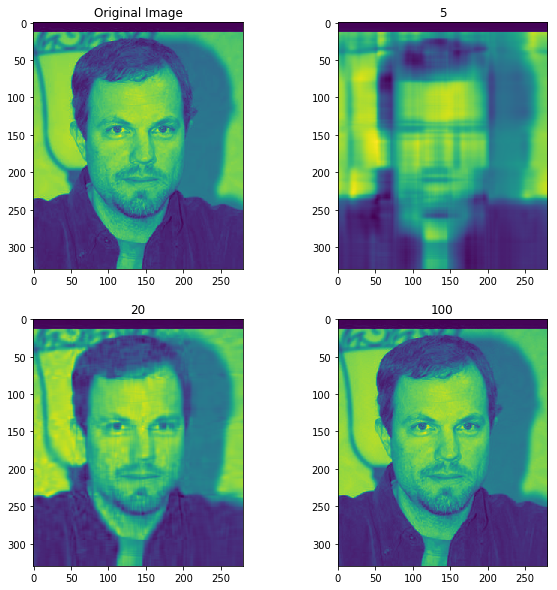

In [8]:
show_images(face)

# Part b)

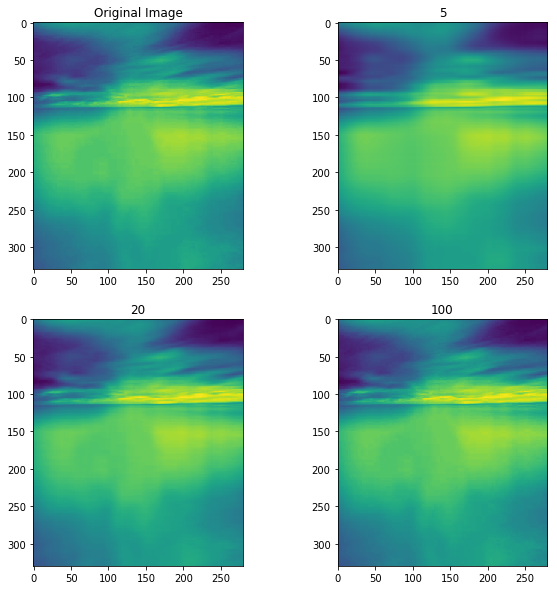

In [9]:
sky = imread("./data/sky.jpg")
show_images(sky)

# Part c)

In [10]:
def mse(img1, img2):
    return np.sum((img1 - img2) ** 2)

In [11]:
x_range = range(1,101)
face_error = [mse(face, low_rank_approximation(face, rank)) for rank in x_range]
sky_error = [mse(sky, low_rank_approximation(sky, rank)) for rank in x_range]

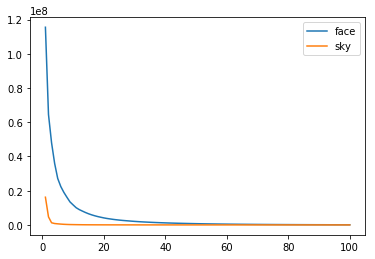

In [12]:
plt.figure()
plt.plot(x_range, face_error, label ='face')
plt.plot(x_range, sky_error,label ='sky')
plt.legend()

# Part d)

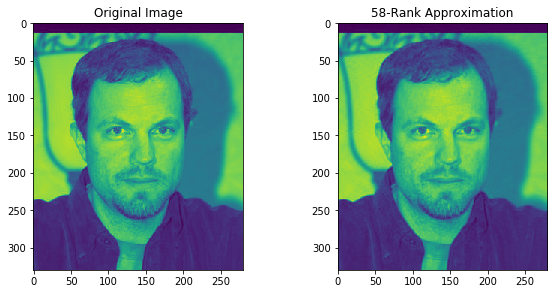

In [36]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax1.set_title("Original Image")
ax1.imshow(face)

ax2 = fig.add_subplot(222)
rank = 58
ax2.set_title(str(rank) + "-Rank Approximation")
approx_image = low_rank_approximation(face, rank)
ax2.imshow(approx_image)

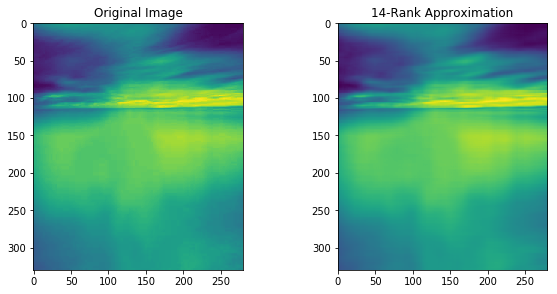

In [33]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax1.set_title("Original Image")
ax1.imshow(sky)

ax2 = fig.add_subplot(222)
rank = 14
ax2.set_title(str(rank) + "-Rank Approximation")
approx_image = low_rank_approximation(sky, rank)
ax2.imshow(approx_image)

The photo of the face needed a higher rank to properly capture the details so that their is an unnoticable difference between the original and ranked. Meanwhile the sky needs a fraction of the rank. The reasons for this is probably that the sky has softer edges and colors that blend smoothly so a loss of detail in those transistions are neglibible, while the face has harsher edges and color transitions that become obvious under low ranks.